PART A: Data Reviewing and Cleaning Exercises

In [44]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [20]:
df = pd.read_csv('student_results.csv')

Examining the Data Structure 
Here to Check:
1. Column names
2. Data types
3. Missing values
4. Unexpected data types or formatting

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   500 non-null    object 
 1   Registration_Number    500 non-null    object 
 2   Sex                    500 non-null    object 
 3   Test_1_Score           500 non-null    float64
 4   Test_3_Score           500 non-null    float64
 5   University_Exam_Score  500 non-null    float64
dtypes: float64(3), object(3)
memory usage: 23.6+ KB


In [22]:
df.head()

,Name,Registration_Number,Sex,Test_1_Score,Test_3_Score,University_Exam_Score
0,Jane Smith,2023-04-46048,Male,75.0,73.6,85.8
1,Emily Williams,2023-04-23434,Male,85.2,119.4,90.1
2,Olivia Davis,2023-04-14165,Male,64.2,69.7,71.1
3,Jane Brown,2023-04-40495,Male,60.8,64.9,81.8
4,James Brown,2023-04-95181,Female,112.5,72.2,103.8


Summary Statistics & Missing Values

In [23]:
df.describe()

,Test_1_Score,Test_3_Score,University_Exam_Score
count,500.000000,500.000000,500.00000
mean,67.753000,72.381200,75.82340
std,14.626079,15.408125,15.35782
min,33.200000,33.100000,33.60000
25%,59.175000,62.600000,65.87500
50%,66.850000,71.000000,75.45000
75%,75.325000,80.600000,85.10000
max,118.200000,119.400000,119.30000


In [24]:
df.isnull().sum()

Name                     0
Registration_Number      0
Sex                      0
Test_1_Score             0
Test_3_Score             0
University_Exam_Score    0
dtype: int64

Duplicates in the dataset

In [25]:
df.duplicated().sum()

0

Now, for categorical variable in our dataset (sex), let's check the unique values for the issue of consistency 

In [26]:
df['Sex'].unique()

array(['Male', 'Female'], dtype=object)

PART B: Summary Statistics

Calculate the mean, median, and standard deviation of the University Exam Score by Sex.


In [27]:
exam_stat_by_sex = df.groupby('Sex')['University_Exam_Score'].agg(['mean', 'median', 'std'])

In [28]:
exam_stat_by_sex

,mean,median,std
Sex,,,
Female,71.525105,69.9,16.842814
Male,79.759387,79.2,12.667419


Correlation Between Test_1_Score, Test_3_Score, and University_Exam_Score

In [29]:
correlation_matrix = df[['Test_1_Score', 'Test_3_Score', 'University_Exam_Score']].corr()

In [30]:
correlation_matrix

,Test_1_Score,Test_3_Score,University_Exam_Score
Test_1_Score,1.000000,0.193338,0.061521
Test_3_Score,0.193338,1.000000,0.047381
University_Exam_Score,0.061521,0.047381,1.000000


PART C: DATA VISUALIZATION 

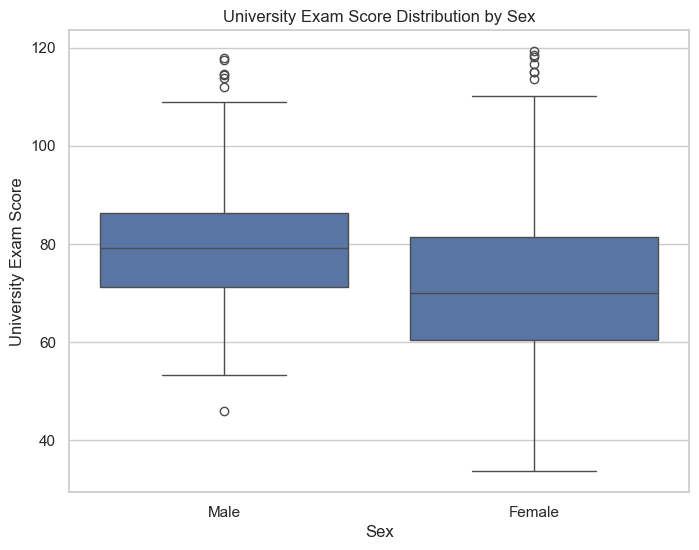

In [31]:
# Set the plot style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Sex', y='University_Exam_Score')
plt.title("University Exam Score Distribution by Sex")
plt.xlabel("Sex")
plt.ylabel("University Exam Score")
plt.show()

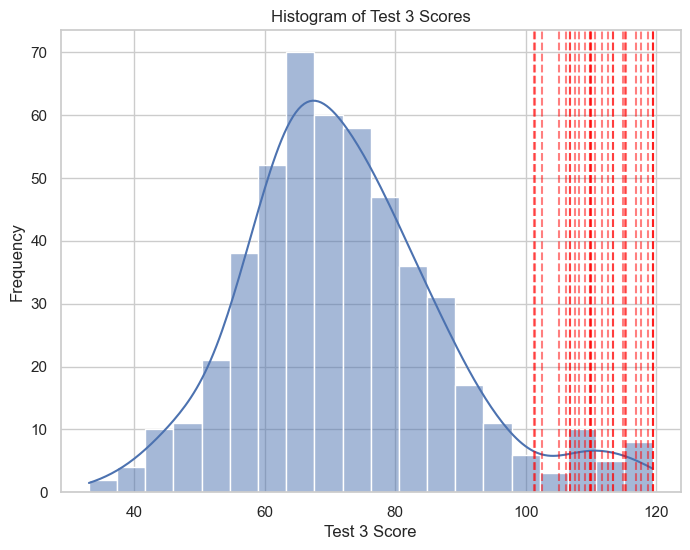

In [32]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Test_3_Score'], bins=20, kde=True)
plt.title("Histogram of Test 3 Scores")
plt.xlabel("Test 3 Score")
plt.ylabel("Frequency")

# Highlight potential outliers (values > 100)
outliers = df[df['Test_3_Score'] > 100]
for score in outliers['Test_3_Score']:
    plt.axvline(score, color='red', linestyle='--', alpha=0.5)

plt.show()

Scatter plot to Analyze Relationship btn Test 1 and UE 

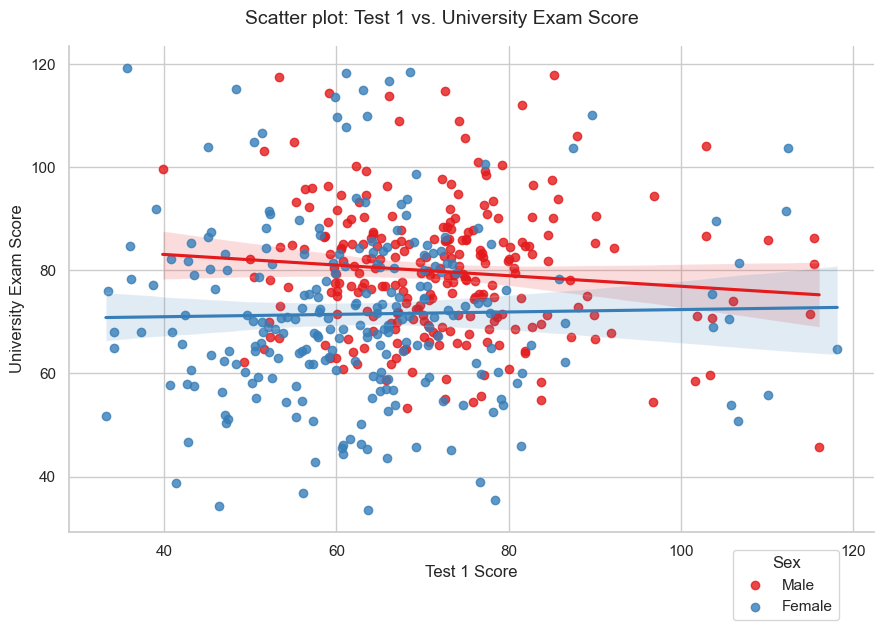

In [33]:
# Set plot style
sns.set(style="whitegrid")

# Create the lmplot without the default legend
g = sns.lmplot(
    data=df,
    x='Test_1_Score',
    y='University_Exam_Score',
    hue='Sex',
    palette='Set1',
    height=6,
    aspect=1.5,
    legend=False
)

# Add title and axis labels
g.set_axis_labels("Test 1 Score", "University Exam Score")
g.fig.suptitle("Scatter plot: Test 1 vs. University Exam Score", fontsize=14)
g.fig.subplots_adjust(top=0.92)

# Add manual legend at the bottom-right corner
handles, labels = g.ax.get_legend_handles_labels()
g.fig.legend(
    handles,
    labels,
    title="Sex",
    loc="lower right",
    bbox_to_anchor=(0.95, -0.05)  # Bottom-right outside the plot
)

plt.show()

PART D: MODELING 

In [34]:
#First, let's drop the outliers

#Declaring the max value for standard exams 
max_score = 100

# Drop rows where any of the scores exceed 100
df_clean = df[
    (df['Test_1_Score'] <= max_score) &
    (df['Test_3_Score'] <= max_score) &
    (df['University_Exam_Score'] <= max_score)
]

In [35]:
#Let's print before and after cleaning 

print('origal rows:', len(df))
print('Rows after removing outliers:', len(df_clean))

origal rows: 500
Rows after removing outliers: 422


Build the Linear Regression Model

In [36]:
# Define features and target
X = df_clean[['Test_1_Score', 'Test_3_Score']]
y = df_clean['University_Exam_Score']

In [37]:
# Split into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Feature Names:", X.columns.tolist())

Intercept: 57.228166340421545
Coefficients: [0.08559417 0.15627294]
Feature Names: ['Test_1_Score', 'Test_3_Score']


In [45]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R² (coefficient of determination)
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# results
print("R² score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)

R² score: 0.007641366800264504
Root Mean Squared Error (RMSE): 13.083534307755695


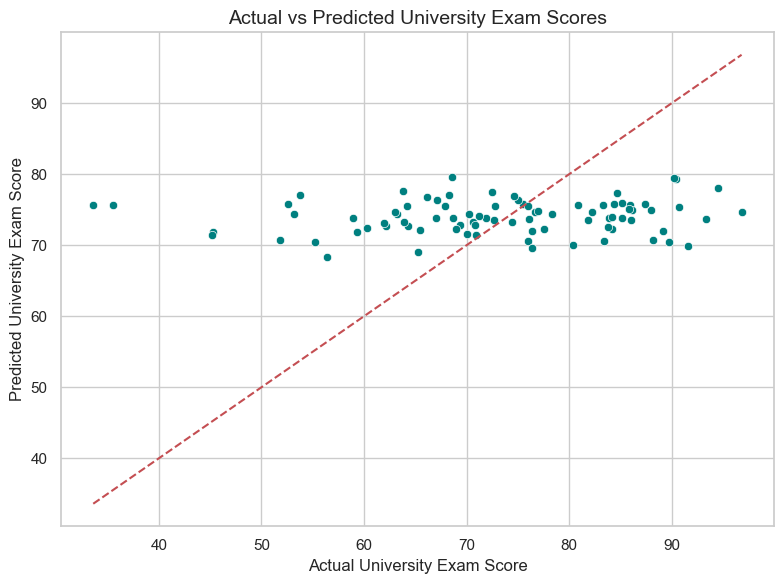

In [46]:
# Predict on the test set
y_pred = model.predict(X_test)

# Create the plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal reference line

# Labels and title
plt.xlabel("Actual University Exam Score", fontsize=12)
plt.ylabel("Predicted University Exam Score", fontsize=12)
plt.title("Actual vs Predicted University Exam Scores", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()